# **Model Setup**

### Loading packages and defining parameters:

In [1]:
from sympy import Identity, symarray

from PyTransport import PyTransSetup

In [2]:
nF, nP = 2, 3  # Number of fields and parameters
f, p = symarray('f', nF), symarray('p', nP) # SymPy arrays containing the fields and parameters

### Expressions for the potential and field-space metric:

In [3]:
V = p[0]/2 * p[2]**2 * (f[0]**2 + p[1]*f[1]**2) # Here, p is [alpha, R, mphi] and f is [phi, chi]
G = 6 * p[0] / (1-f[0]**2-f[1]**2)**2 * Identity(2)

### PyTransport setup:

In [4]:
PyTransSetup.potential(V, nF, nP, False, G) # Converts potential defined above to C++ code
PyTransSetup.compileName3("Angular", True)  # Compiles a package called PyTransAngular with many useful functions

running install
running build
running build_ext
building 'PyTransAngular' extension
creating build
creating build/temp.linux-x86_64-3.8
creating build/temp.linux-x86_64-3.8/home
creating build/temp.linux-x86_64-3.8/home/gsalinas
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/PyTrans
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/CppTrans
creating build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/CppTrans/stepper
gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -DOPENSSL_NO_SSL3 -fPIC -I/home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include -I/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/ -I/home/gsalinas/.pyenv/versions/3.8.10/envs

In file included from /home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include/numpy/ndarraytypes.h:1940,
                 from /home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /home/gsalinas/GitHub/angular/PyTransport/PyTrans/PyTrans.cpp:20:
/home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
In file included from /home/gsalinas/GitHub/angular/PyTransport/CppTrans/NC/moments.h:20,
                 from /home/gsalinas/GitHub

gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -DOPENSSL_NO_SSL3 -fPIC -I/home/gsalinas/.pyenv/versions/3.8.10/envs/angular/lib/python3.8/site-packages/numpy/core/include -I/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/ -I/home/gsalinas/.pyenv/versions/3.8.10/envs/angular/include -I/home/gsalinas/.pyenv/versions/3.8.10/include/python3.8 -c /home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/stepper/rkf45.cpp -o build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/stepper/rkf45.o


/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/stepper/rkf45.cpp: In function ‘void timestamp()’:
/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/stepper/rkf45.cpp:1116:12: warning: variable ‘len’ set but not used [-Wunused-but-set-variable]
 1116 |     size_t len;
      |            ^~~


creating build/lib.linux-x86_64-3.8
g++ -shared -L/home/gsalinas/.pyenv/versions/3.8.10/lib -Wl,-rpath=/home/gsalinas/.pyenv/versions/3.8.10/lib -L/home/gsalinas/.pyenv/versions/3.8.10/lib -Wl,-rpath=/home/gsalinas/.pyenv/versions/3.8.10/lib build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/PyTrans/PyTrans.o build/temp.linux-x86_64-3.8/home/gsalinas/GitHub/angular/PyTransport/PyTrans/../CppTrans/stepper/rkf45.o -L/home/gsalinas/.pyenv/versions/3.8.10/lib -o build/lib.linux-x86_64-3.8/PyTransAngular.cpython-38-x86_64-linux-gnu.so
running install_lib
copying build/lib.linux-x86_64-3.8/PyTransAngular.cpython-38-x86_64-linux-gnu.so -> /home/gsalinas/GitHub/angular/PyTransport/PyTrans//lib/python
running install_egg_info
Removing /home/gsalinas/GitHub/angular/PyTransport/PyTrans//lib/python/PyTransAngular-1.0-py3.8.egg-info
Writing /home/gsalinas/GitHub/angular/PyTransport/PyTrans//lib/python/PyTransAngular-1.0-py3.8.egg-info


# **Background Evolution**

### Loading more packages:

In [5]:
import json
import sys
from math import cos, pi, sin

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams['text.usetex'] = True
mpl.rcParams['figure.dpi'] = 196
location = "/home/gsalinas/GitHub/angular/PyTransport"
sys.path.append(location)

import PyTransSetup

PyTransSetup.pathSet()

import PyTransAngular as PyT

### Functions to calculate background evolution:

In [6]:
def get_background(initial: np.ndarray, params: dict, Nrange: tuple, tol: float = 1e-30) -> np.ndarray:
    """Calculates background evolution of fields.
    Inputs:
    - initial:      Initial field values and field velocities
    - params:       Parameter values
    - Nrange:       Number of e-folds range and step in the form (Nini, Nend, Nstep)
    - tol:          Tolerances (abs and rel) for integrator

    Returns:
    - back:         2d-array with field values and velocities for each number of e-folds
    """
    Ns = np.linspace(Nrange[0], Nrange[1], Nrange[2], endpoint=True)
    pval = np.array(list(params.values()))
    tols = np.array([tol, tol])
    back = PyT.backEvolve(Ns, initial, pval, tols, True)
    return back

def get_background_func(back: np.ndarray) -> tuple:
    """Calculates background evolution of fields.
    Inputs:
    - back:         2d-array with field values and velocities for each number of e-folds

    Returns:
    - phi:          Function that returns phi given number of e-folds
    - chi:          Function that returns chi given number of e-folds
    - phidot:       Function that returns phidot given number of e-folds
    - chidot:       Function that returns chidot given number of e-folds
    """
    Ns, phis, chis, phidots, chidots = back[:, 0], back[:, 1], back[:, 2], back[:, 3], back[:, 4]
    phi, chi, phidot, chidot = lambda N: np.interp(N, Ns, phis), lambda N: np.interp(N, Ns, chis), \
        lambda N: np.interp(N, Ns, phidots), lambda N: np.interp(N, Ns, chidots)

    return phi, chi, phidot, chidot

### Parameter values:

In [7]:
params = {'alpha': 1/600, 'R': 9, 'mphi': 2.e-5}
with open("./output/setup/params.json", "w") as file:   # Saving parameters to a file
        json.dump(params, file)

### Initial conditions:

In [8]:
r0, theta0 = 0.99, pi/4
phi0, chi0 = r0 * np.array([cos(theta0), sin(theta0)])  # Initial field values

phidot0, chidot0 = np.zeros(2)  # Initial field velocities

### Calculate background evolution:

In [9]:
initial = np.array([phi0, chi0, phidot0, chidot0])  # Array containing initial field values and velocities
Nini, Nfinal = 0, 100     # Initial and final number of e-folds
Nsteps = 500_000    # Number of steps of integration for the background calculation. If the code runs too slow, decrease this value.
Nrange = (Nini, Nfinal, Nsteps)

back = get_background(initial, params, Nrange)  # Calculates the background, each row of 'back' is of the form [N, phi, chi, phidot, chidot]
phix, phiy, phidotx, phidoty = get_background_func(back)    # Functions to calculate phix, phiy, phidotx and phidoty. For example, use phix(10.) to calculate phix at N=10.
np.save("output/background/background.npy", back)   # Save background to file

458116


In [10]:
Nend = back[-1, 0]    # Number of efolds at the end of inflation
print(f'Number of e-folds: {Nend:.3}')

efolds_before = 55. # How many e-folds before the end of inflation to get horizon crossing
Nexit = Nend - efolds_before    # Number of efolds at horizon crossing
print(f'Horizon exit: {Nexit:.3}')

Number of e-folds: 91.6
Horizon exit: 36.6


### Plot background evolution:

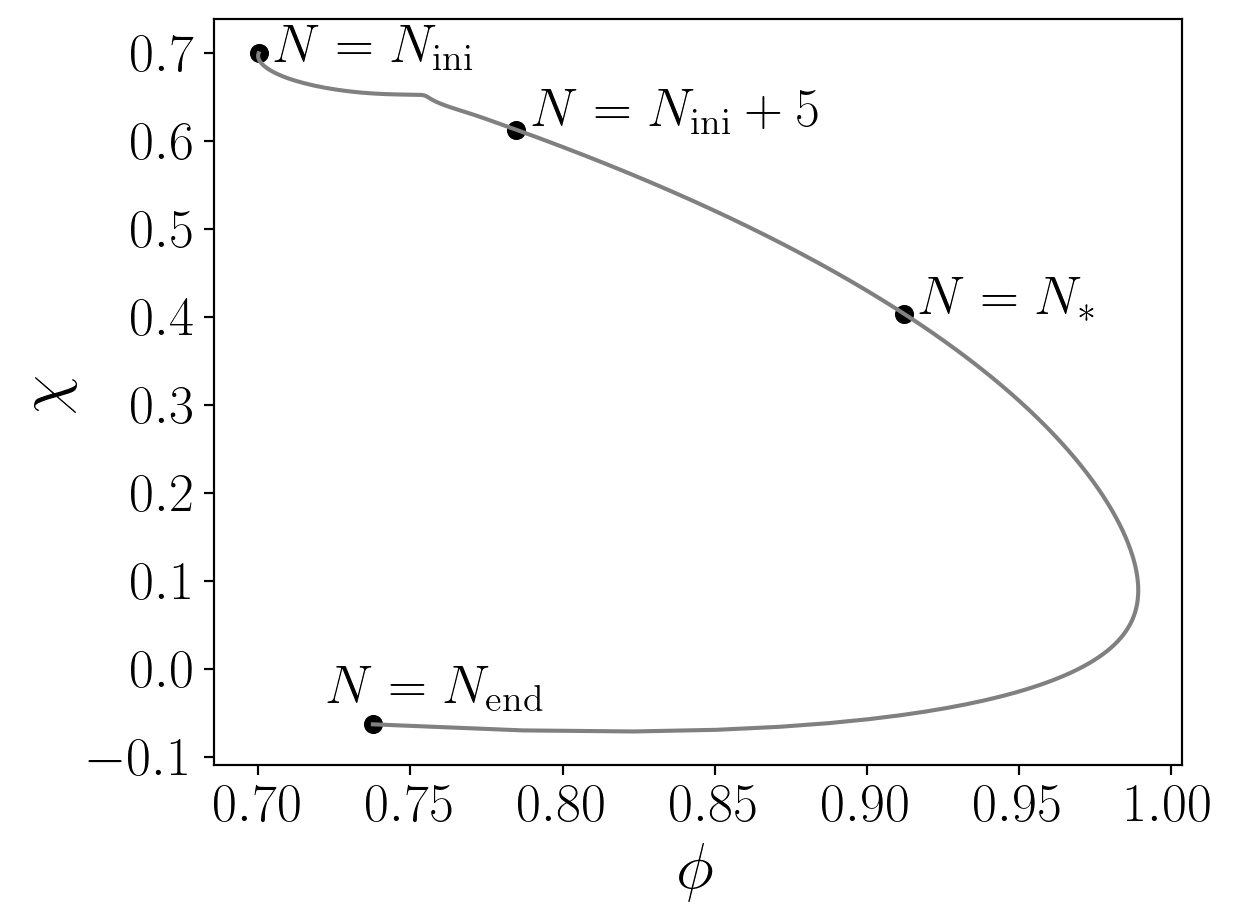

In [12]:
num_points_plot = 10_000 # Number of points to use in the plot
Nplot = np.linspace(Nini, Nend, num_points_plot)

plt.plot(phix(Nplot), phiy(Nplot), c='gray')
plt.scatter([phix(Nini), phix(Nini+5.), phix(Nexit), phix(Nend)],
            [phiy(Nini), phiy(Nini+5.), phiy(Nexit), phiy(Nend)],
            c="k")
plt.annotate("$N = N_{\\rm ini}$", (phix(Nini)+0.005, phiy(Nini)-0.01), fontsize=20)
plt.annotate("$N = N_{\\rm ini}+5$", (phix(Nini+5.)+0.005, phiy(Nini+5.)+0.005), fontsize=20)
plt.annotate("$N = N_*$", (phix(Nexit)+0.005, phiy(Nexit)), fontsize=20)
plt.annotate("$N = N_{\\rm end}$", (phix(Nend)-0.015, phiy(Nend)+0.025), fontsize=20)
plt.xlabel(r'$\phi$', fontsize=24)
plt.ylabel(r'$\chi$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("output/background/background.png")

# **Curved Manifold**

### Some useful functions:

In [13]:
# Dot product between field-space vectors with metric G
def dotG(G: np.ndarray, v1: np.ndarray, v2: np.ndarray) -> float:
    return np.matmul(v1, np.matmul(G, v2))

# Magnitude of field-space vector with metric G
def magG(G: np.ndarray, v: np.ndarray) -> float:
    return np.sqrt(dotG(G, v, v))

# Unit vector along the direction of the vector phidot
def epll(G: np.ndarray, phidot: np.ndarray) -> np.ndarray:
    return phidot / magG(G, phidot)

# Unit vector perpendicular to the vector phidot, eta is the acceleration
def eperp2d(G: np.ndarray, phidot: np.ndarray, eta: np.ndarray) -> np.ndarray:
    epll_vec = epll(G, phidot)
    eperp_notnorm = np.matmul(np.identity(2) - np.outer(epll_vec, np.matmul(G, epll_vec)), eta)
    return eperp_notnorm / magG(G, eperp_notnorm)

# **Slow-roll Parameters**

### Loading some more packages:

In [14]:
import pickle
from itertools import combinations_with_replacement, product
from typing import List, Callable

import numdifftools as nd
from sympy.utilities import lambdify

### Many useful functions:

In [18]:
# Find the Hubble parameter for each N in 'back'
def get_Hs(back: np.ndarray, params: dict) -> tuple:
    pval = np.array(list(params.values()))
    Hs = np.array([PyT.H(elem, pval) for elem in back[:, 1:]])
    return np.hstack((back[:, 0].reshape(-1,1), Hs.reshape(-1,1)))

# Find the Hubble parameter as a function of N
def get_H_func(back: np.ndarray, params: dict) -> Callable:
    phix, phiy, phidotx, phidoty = get_background_func(back)
    pval = np.array(list(params.values()))
    return lambda N: PyT.H(np.array((phix(N),phiy(N), phidotx(N), phidoty(N))), pval)

# Find the epsilon parameter for each N in 'back'
def get_epsilons(back: np.ndarray, params: dict) -> tuple:
    dN = back[1, 0] - back[0, 0]
    Hs = get_Hs(back, params)[:, 1]
    epsilons = -np.gradient(Hs, dN)/Hs
    return np.hstack((back[:, 0].reshape(-1,1), epsilons.reshape(-1,1)))

# Find the epsilon parameter as a function of N
def get_epsilon_func(back: np.ndarray, params: dict) -> Callable:
    H = get_H_func(back, params)
    return lambda N: -nd.Derivative(H)(N) / H(N)

# Find the derivatives of field values w.r.t. the number of e-folds N, for each N in 'back'
def get_phi_primes(back: np.ndarray, params: dict) -> tuple:
    nF = PyT.nF()
    Hs = get_Hs(back, params)[:, 1]
    phi_primes = (back[:, nF+1:].T / Hs).T
    return np.hstack((back[:, 0].reshape(-1,1), phi_primes))

# Find the derivatives of field values w.r.t. the number of e-folds N as a function of N
def get_phi_prime_func(back: np.ndarray, params: dict) -> Callable:
    _, _, phidotx, phidoty = get_background_func(back)
    H_func = get_H_func(back, params)
    return lambda N: np.array([phidotx(N), phidoty(N)]) / H_func(N)

# Find the second derivatives of field values w.r.t. the number of e-folds N, for each N in 'back'
def get_phi_double_primes(back: np.ndarray, params: dict) -> tuple:
    dN = back[1, 0] - back[0, 0]
    phi_primes = get_phi_primes(back, params)[:, 1:]
    phi_double_primes = np.gradient(phi_primes.T, dN, axis=1).T
    return np.hstack((back[:, 0].reshape(-1,1), phi_double_primes))

# Find the second derivatives of field values w.r.t. the number of e-folds N as a function of N
def get_phi_double_prime_func(back: np.ndarray, params: dict) -> Callable:
    phiprime = get_phi_prime_func(back, params)
    return lambda N: nd.Derivative(phiprime)(N)

# Metric as a SymPy Matrix
def get_metric_sympy():
    with open("./output/setup/G.txt", "rb") as file:
        G = pickle.load(file)

    return G

# Metric as a function of field values
def get_metric_fieldsfunc(params: dict) -> Callable:
    nF = PyT.nF()
    G = get_metric_sympy()
    pval = list(params.values())
    params_subs = {'p_'+str(ii): pval[ii] for ii in range(len(pval))}

    return lambdify(['f_'+str(ii) for ii in range(nF)], G.subs(params_subs))

# Metric as a function of number of e-folds N
def get_metric_func(back: np.ndarray, params: dict) -> Callable:
    G_fieldsfunc = get_metric_fieldsfunc(params)
    phix, phiy, *_ = get_background_func(back)

    return lambda N: G_fieldsfunc(phix(N), phiy(N))

# Metric for each N in 'back'
def get_metrics(back: np.ndarray, params: dict) -> np.ndarray:
    nF = PyT.nF()
    phis = back[:, 1:nF+1]    
    G = get_metric_fieldsfunc(params)
    return np.array([G(phi[0], phi[1]) for phi in phis])

# Christoffel symbols as a function of field values
def get_christoffel_fieldfunc(params: dict) -> List[Callable]:
    nF, nP = PyT.nF(), PyT.nP()
    Gamma_sympy = PyTransSetup.fieldmetric(get_metric_sympy(), nF, nP)[1]

    Gamma_func = np.empty((nF, nF, nF)).tolist()
    pval = list(params.values())
    params_subs = {'p_'+str(ii): pval[ii] for ii in range(len(pval))}
    for aa, (bb, cc) in product(range(1, nF+1), combinations_with_replacement(range(1, nF+1), 2)):
        Gamma_func[aa-1][bb-1][cc-1] = Gamma_sympy(-aa, bb, cc).subs(params_subs)
        if bb != cc:
            Gamma_func[aa-1][cc-1][bb-1] = Gamma_func[aa-1][bb-1][cc-1]

    return lambdify(['f_'+str(ii) for ii in range(nF)], Gamma_func)

# Christoffel symbols as a function of N
def get_christoffel_func(back: np.ndarray, params: dict) -> List[Callable]:
    Gamma_fieldsfunc = get_christoffel_fieldfunc(params)
    phix, phiy, *_ = get_background_func(back)

    return lambda N: Gamma_fieldsfunc(phix(N), phiy(N))

# Christoffel symbols for each N in 'back'
def get_christoffels(back: np.ndarray, params: dict) -> np.ndarray:
    nF = PyT.nF()
    phis = back[:, 1:nF+1]
    Gamma_func = get_christoffel_fieldfunc(params)
    Gammas = np.array([Gamma_func(phi[0], phi[1]) for phi in phis])

    return Gammas

# Acceleration for each N in 'back'
def get_etas(back: np.ndarray, params: dict) -> np.ndarray:
    nF = PyT.nF()
    Gammas = get_christoffels(back, params)
    phi_primes = get_phi_primes(back, params)[:, 1:]
    etas = get_phi_double_primes(back, params)[:, 1:]
    for ii in range(len(back[:, 0])):
        for aa in range(nF):
            etas[ii, aa] += sum([Gammas[ii, aa, bb, cc] * phi_primes[ii, bb] * phi_primes[ii, cc]
                                for bb, cc in product(range(nF), repeat=2)])

    return np.hstack((back[:, 0].reshape(-1, 1), etas))

# Acceleration as a function of N
def get_eta_func(back: np.ndarray, params: dict) -> Callable:
    nF = PyT.nF()
    Gammas = get_christoffel_func(back, params)
    phi_prime = get_phi_prime_func(back, params)

    return lambda N: get_phi_double_prime_func(back, params)(N) + phi_prime(N) @ Gammas(N) @ phi_prime(N)

# **Two-point Functions**

### Again, defining some functions:

In [25]:
import PyTransScripts as PyS

# Find the initial conditions for the integrator that calculates 2pt functions
def get_2pt_initial(back: np.ndarray, params: dict, efolds_before: float, NB: float = 8.):
    pval = np.array(list(params.values()))
    
    Ns = back[:, 0]
    Nexit = Ns[-1] - efolds_before

    k = PyS.kexitN(Nexit, back, pval, PyT)
    Nstart, backExitMinus = PyS.ICsBE(NB, k, back, pval, PyT)

    return k, Nstart, backExitMinus

# Get 2pt functions for each N in 'back'
def get_2pts(back: np.ndarray, params: dict, efolds_before: float, NB: float = 8., tol: float = 1e-16) -> tuple:
    pval = np.array(list(params.values()))
    k, Nstart, backExitMinus = get_2pt_initial(back, params, efolds_before, NB) # Get initial conditions for integration
    
    Ns = back[:, 0]
    Nev = Ns[Ns >= Nstart]
    tols = np.array([tol, tol])
    twoPt = PyT.sigEvolve(Nev, k, backExitMinus, pval, tols, True)  # Calculates 2pt functions for each value of N

    # Decomposing the result into power spectrum andmatrix Pphi
    Nsig = twoPt[:, 0]
    Pzeta = twoPt[:, 1]
    sigma = twoPt[:, 1+1+2*nF:].reshape(len(Nsig), 2*nF, 2*nF)
    Pphi = sigma[:, :nF, :nF]

    # Deforming k slightly to find ns
    k_deformed = k + 0.01*k
    twoPt_deformed = PyT.sigEvolve(Nev, k_deformed, backExitMinus, pval, tols, True)
    Pzeta_deformed = twoPt_deformed[:, 1]

    # Formula for ns, note that the factor of 4.0 comes from the fact that PR has an additional k^3 factor
    ns = (np.log(Pzeta_deformed[-1])-np.log(Pzeta[-1])) / (np.log(k_deformed)-np.log(k)) + 4.0
    Pzeta = Pzeta * k**3 / 2 / np.pi**2

    return Nsig, Pphi, Pzeta, k, ns

# Get 2pt functions as a function of N
def get_2pts_func(back: np.ndarray, params: dict, efolds_before: float, NB: float = 8., tol: float = 1e-16) -> tuple:
    nF = PyT.nF()
    pval = np.array(list(params.values()))
    
    k, Nstart, backExitMinus = get_2pt_initial(back, params, efolds_before, NB)

    Ns = back[:, 0]
    Nev = Ns[Ns >= Nstart]
    tols = np.array([tol, tol])
    twoPt = PyT.sigEvolve(Nev, k, backExitMinus, pval, tols, True)

    Nsig = twoPt[:, 0]
    Pzeta = twoPt[:, 1]
    sigma = twoPt[:, 1+1+2*nF:].reshape(len(Nsig), 2*nF, 2*nF)
    Pphi = sigma[:, :nF, :nF]

    k_deformed = k + 0.001*k
    twoPt_deformed = PyT.sigEvolve(Nev, k_deformed, backExitMinus, pval, tols, True) 
    Pzeta_deformed = twoPt_deformed[:, 1]
    ns = (np.log(Pzeta_deformed[-1])-np.log(Pzeta[-1])) / (np.log(k_deformed)-np.log(k)) + 4.0

    Pzeta_nodim = Pzeta * k**3 / 2 / np.pi**2

    Pphi_func = lambda N: np.array([np.interp(N, Nsig, Pphi[:, aa, bb]) for aa, bb in product(range(nF), repeat=2)]).reshape(nF, nF)

    return Nsig, Pphi_func, lambda N: np.interp(N, Nsig, Pzeta_nodim), k, ns

# Get PR, CRS and PS for each N in 'back'
def get_PR_PS_CRS(back: np.ndarray, params: dict, efolds_before: float, NB: float = 8., tol: float = 1e-8):
    Nsig, Pphi, _, k, _ = get_2pts(back, params, efolds_before, NB, tol)
    
    back = back[back.T[0] >= Nsig[0]]
    phidots = back[:, 3:]
    epsilons = get_epsilons(back, params)[:, 1]
    etas = get_etas(back, params)[:, 1:]
    Gs = get_metrics(back, params)

    PR = np.array([epll(Gs[ii], phidots[ii]) @ Gs[ii] @ Pphi[ii] @ Gs[ii] @ epll(Gs[ii], phidots[ii])
                for ii in range(len(Nsig))]) / 2 / epsilons
    PR = PR * k**3 / 2 / np.pi**2
    CRS = np.array([epll(Gs[ii], phidots[ii]) @ Gs[ii] @ Pphi[ii] @ Gs[ii] @ eperp2d(Gs[ii], phidots[ii], etas[ii])
                for ii in range(len(Nsig))]) / 2 / epsilons
    CRS = CRS * k**3 / 2 / np.pi**2
    PS = np.array([eperp2d(Gs[ii], phidots[ii], etas[ii]) @ Gs[ii] @ Pphi[ii] @ Gs[ii] @ eperp2d(Gs[ii], phidots[ii], etas[ii])
                for ii in range(len(Nsig))]) / 2 / epsilons
    PS = PS * k**3 / 2 / np.pi**2
    return PR, CRS, PS

# Get PR, CRS and PS as functions of N
def get_PR_PS_CRS_func(back: np.ndarray, params: dict, efolds_before: float, NB: float = 8., tol: float = 1e-8) -> tuple:
    _, _, phidotx, phidoty = get_background_func(back)
    _, Pphi, _, k, _ = get_2pts_func(back, params, efolds_before, NB, tol)

    epsilon = get_epsilon_func(back, params)
    eta = get_eta_func(back, params)
    G = get_metric_func(back, params)

    PR = lambda N: epll(G(N), np.array([phidotx(N), phidoty(N)])) @ G(N) @ Pphi(N) @ G(N) @ \
        epll(G(N), np.array([phidotx(N), phidoty(N)])) * k**3 / 4 / np.pi**2 / epsilon(N)
    CRS = lambda N: epll(G(N), np.array([phidotx(N), phidoty(N)])) @ G(N) @ Pphi(N) @ G(N) @ \
        eperp2d(G(N), np.array([phidotx(N), phidoty(N)]), eta(N)) * k**3 / 4 / np.pi**2 / epsilon(N)
    PS = lambda N: eperp2d(G(N), np.array([phidotx(N), phidoty(N)]), eta(N)) @ G(N) @ Pphi(N) @ G(N) @ \
        eperp2d(G(N), np.array([phidotx(N), phidoty(N)]), eta(N)) * k**3 / 4 / np.pi**2 / epsilon(N)

    return PR, CRS, PS

### Calculate 2pt functions for each value of $N$ and find $n_s$:

In [26]:
Nsig, Pphi, Pzeta, k, ns = get_2pts(back, params, efolds_before)
print("ns: ", ns)

ns:  0.9652394109288478


### Plot of 2pt functions

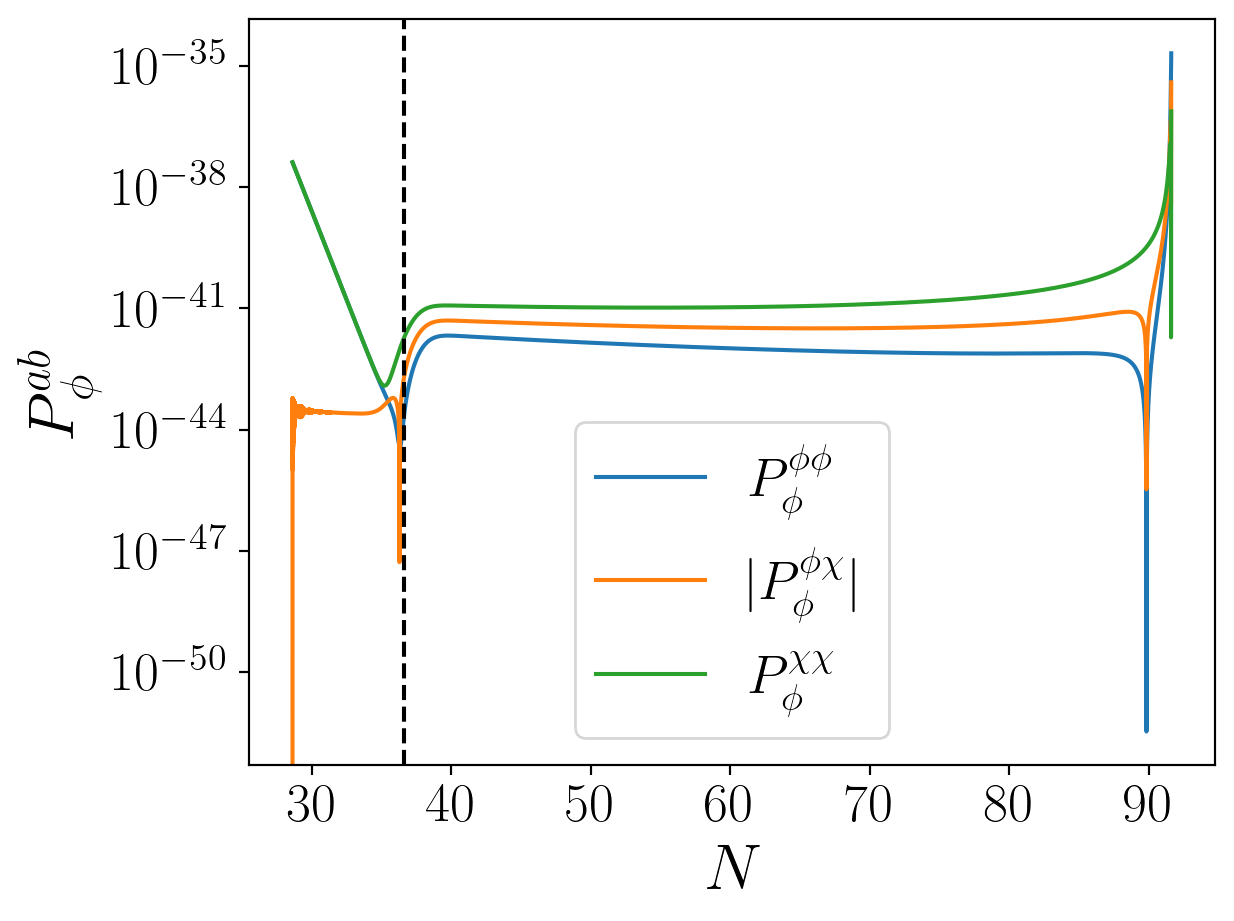

In [27]:
plt.plot(Nsig, Pphi[:, 0, 0], label=r"$P^{\phi\phi}_\phi$")
plt.plot(Nsig, np.abs(Pphi[:, 0, 1]), label=r"$\vert P^{\phi\chi}_\phi \vert$")
plt.plot(Nsig, Pphi[:, 1, 1], label=r"$P^{\chi\chi}_\phi$")
plt.axvline(Nexit, c='k', linestyle='--')
plt.legend(fontsize=20)
plt.ylabel(r'$P^{ab}_\phi$', fontsize=24) 
plt.xlabel(r'$N$', fontsize=24)
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("./output/2pt/2pt.png")

### Calculate $P_\mathcal{R}$, $C_\mathcal{RS}$, $P_\mathcal{S}$:

In [28]:
PR, CRS, PS = get_PR_PS_CRS_func(back, params, efolds_before)
PRs, CRSs, PSs = get_PR_PS_CRS(back, params, efolds_before)

print(f"""At horizon crossing:
PR = {PR(Nexit):.3}
CRS = {CRS(Nexit):.3}
PS = {PS(Nexit):.3}""")

At horizon crossing:
PR = 2.05e-10
CRS = 6.66e-11
PS = 2.18e-11


### Plots of $P_\mathcal{R}$, $C_\mathcal{RS}$, $P_\mathcal{S}$ as functions of $N$:

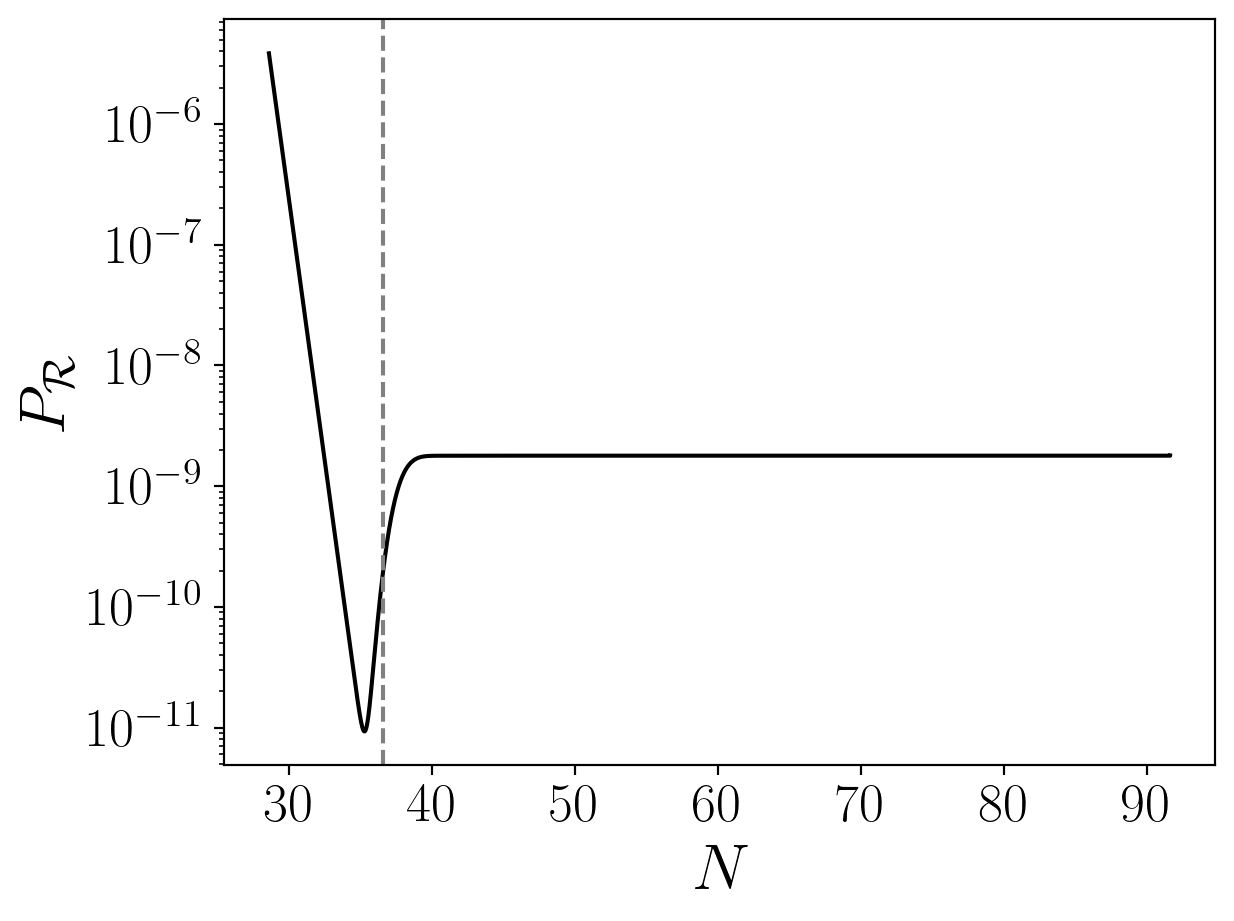

In [29]:
plt.plot(Nsig, PRs, c='k')
plt.axvline(Nexit, c='gray', linestyle='--')
plt.ylabel(r'$P_\mathcal{R}$', fontsize=24) 
plt.xlabel(r'$N$', fontsize=24)
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("./output/2pt/PR.png")

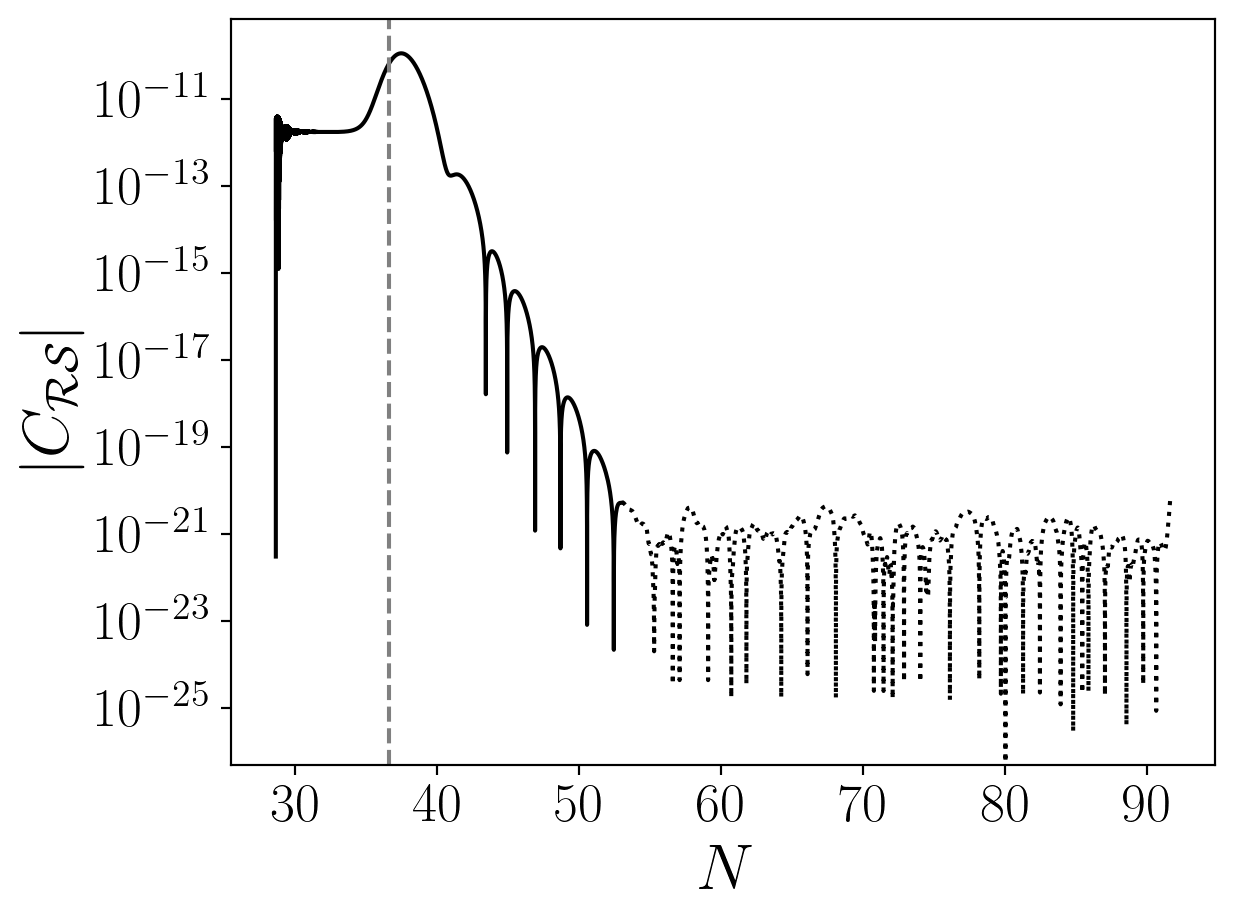

In [30]:
Ncut = 53.
plt.plot(Nsig[Nsig<Ncut], np.abs(CRSs)[Nsig<Ncut], c='k')
plt.plot(Nsig[Nsig>Ncut], np.abs(CRSs)[Nsig>Ncut], c='k', linestyle='dotted')
plt.axvline(Nexit, c='gray', linestyle='--')
plt.ylabel(r'$\vert C_\mathcal{RS} \vert$', fontsize=24) 
plt.xlabel(r'$N$', fontsize=24)
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("./output/2pt/CRS.png")

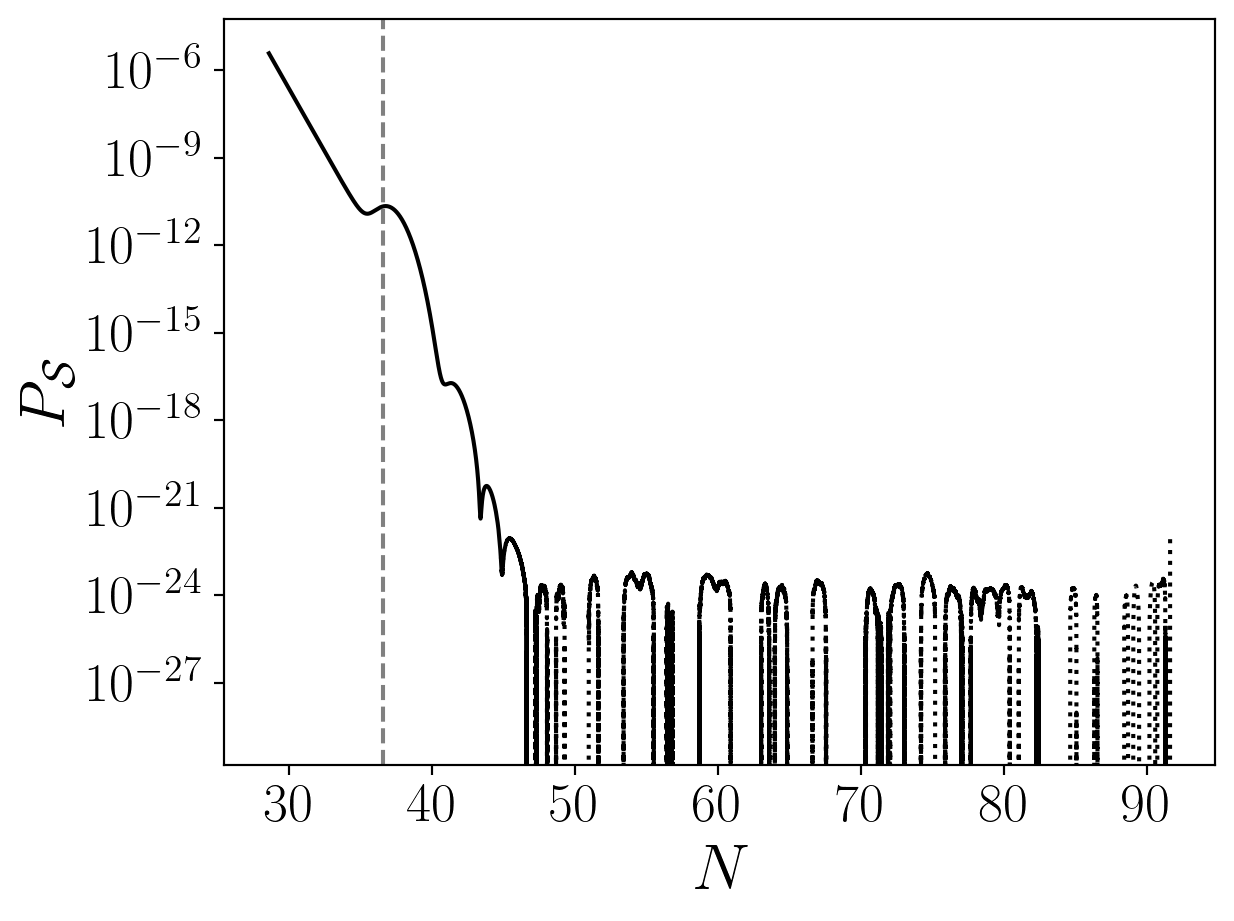

In [31]:
Ncut2 = 47.
plt.plot(Nsig[Nsig<Ncut2], PSs[Nsig<Ncut2], c='k')
plt.plot(Nsig[Nsig>Ncut2], PSs[Nsig>Ncut2], c='k', linestyle='dotted')
# plt.plot(Nsig, PSs, linestyle="dotted", c='k')
plt.axvline(Nexit, c='gray', linestyle='--')
plt.ylabel(r'$P_\mathcal{S}$', fontsize=24) 
plt.xlabel(r'$N$', fontsize=24)
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("./output/2pt/PS.png")